In [7]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [8]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [9]:
# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql


In [10]:
# Load the solar radiation data

Rd = pd.read_csv(r"C:\internship\SolarPrediction.csv", header=0)

# Copy to back-up file

Rd_bk = Rd.copy()

# Display first 5 values

Rd.head()


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [11]:
import datetime

#Date

Rd['Year'] = pd.DatetimeIndex(Rd['Data']).year
Rd['Month'] = pd.DatetimeIndex(Rd['Data']).month
Rd['Day'] = pd.DatetimeIndex(Rd['Data']).day
Rd.head()


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Year,Month,Day
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016,9,29
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016,9,29
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016,9,29
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016,9,29
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016,9,29


In [12]:
#Time 
Rd['Hour'] = pd.DatetimeIndex(Rd['Time']).hour
Rd['Minute'] = pd.DatetimeIndex(Rd['Time']).minute
Rd['Second'] = pd.DatetimeIndex(Rd['Time']).second

Rd.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Year,Month,Day,Hour,Minute,Second
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016,9,29,23,55,26
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016,9,29,23,50,23
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016,9,29,23,45,26
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016,9,29,23,40,21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016,9,29,23,35,24


In [13]:
Rd['SunPerDay'] = pd.DatetimeIndex(Rd['TimeSunSet']) - pd.DatetimeIndex(Rd['TimeSunRise'])
Rd.head()


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Year,Month,Day,Hour,Minute,Second,SunPerDay
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016,9,29,23,55,26,0 days 12:00:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016,9,29,23,50,23,0 days 12:00:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016,9,29,23,45,26,0 days 12:00:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016,9,29,23,40,21,0 days 12:00:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016,9,29,23,35,24,0 days 12:00:00


In [14]:
Rd['SunPerDayHours'] = pd.DatetimeIndex(Rd['TimeSunSet']).hour - pd.DatetimeIndex(Rd['TimeSunRise']).hour

In [15]:
Rd.drop('Time', axis = 1, inplace=True)
Rd.drop('Data', axis = 1, inplace=True)
Rd.drop('TimeSunRise', axis = 1, inplace=True)
Rd.drop('TimeSunSet', axis = 1, inplace=True)
Rd.drop('SunPerDay', axis = 1, inplace=True)

Rd.head()


,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Year,Month,Day,Hour,Minute,Second,SunPerDayHours
0,1475229326,1.21,48,30.46,59,177.39,5.62,2016,9,29,23,55,26,12
1,1475229023,1.21,48,30.46,58,176.78,3.37,2016,9,29,23,50,23,12
2,1475228726,1.23,48,30.46,57,158.75,3.37,2016,9,29,23,45,26,12
3,1475228421,1.21,48,30.46,60,137.71,3.37,2016,9,29,23,40,21,12
4,1475228124,1.17,48,30.46,62,104.95,5.62,2016,9,29,23,35,24,12


In [16]:
Rd.drop('UNIXTime', axis = 1, inplace=True)
Rd.drop('Year', axis = 1, inplace=True)

In [17]:
# Display the radiation data information

Rd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Radiation               32686 non-null  float64
 1   Temperature             32686 non-null  int64  
 2   Pressure                32686 non-null  float64
 3   Humidity                32686 non-null  int64  
 4   WindDirection(Degrees)  32686 non-null  float64
 5   Speed                   32686 non-null  float64
 6   Month                   32686 non-null  int64  
 7   Day                     32686 non-null  int64  
 8   Hour                    32686 non-null  int64  
 9   Minute                  32686 non-null  int64  
 10  Second                  32686 non-null  int64  
 11  SunPerDayHours          32686 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 3.0 MB


In [19]:
# Displaying Duplicate values with in radiation dataset, if avialble

Rd_dup = Rd[Rd.duplicated(keep='last')]
Rd_dup



,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,SunPerDayHours


In [20]:
# Remove the identified duplicate records 

Rd = Rd.drop_duplicates()

# Display the shape of the dataset

Rd.shape

(32686, 12)

In [21]:
# Display the unique values of the all the variables

Rd.nunique()

Radiation                 14434
Temperature                  38
Pressure                     38
Humidity                     94
WindDirection(Degrees)    17951
Speed                        37
Month                         4
Day                          31
Hour                         24
Minute                       27
Second                       60
SunPerDayHours                2
dtype: int64

In [22]:
# Count the missing values by each variable, if available

Rd.isnull().sum()



Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
Month                     0
Day                       0
Hour                      0
Minute                    0
Second                    0
SunPerDayHours            0
dtype: int64

Text(0.5, 0, 'Attributes')

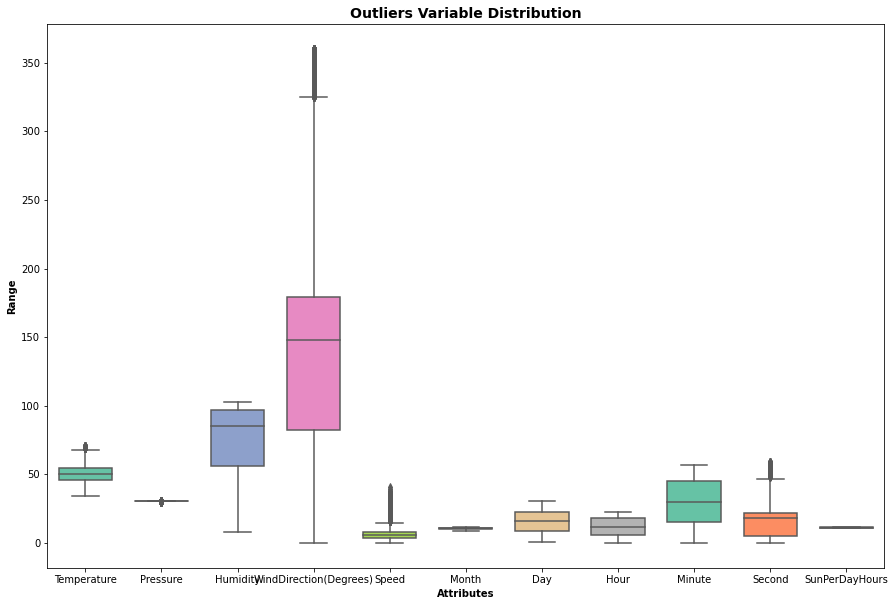

In [23]:
# Outlier Analysis of TotalPrice, Frequency and Recency

import seaborn as sns

variables = ['Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed','Month','Day','Hour','Minute','Second','SunPerDayHours']
plt.rcParams['figure.figsize'] = [15,10]
sns.boxplot(data = Rd[variables], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [24]:
Rd.shape

(32686, 12)

In [27]:
# Removing (statistical) outliers for Speed

Q1 = Rd.Speed.quantile(0.05)
Q3 = Rd.Speed.quantile(0.95)
IQR = Q3 - Q1
Rd = Rd[(Rd.Speed >= Q1 - 1.5*IQR) & (Rd.Speed <= Q3 + 1.5*IQR)]

In [26]:
Rd.shape

(32639, 12)

In [30]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in Rd.columns:
    if col != 'Radiation':
        IndepVar.append(col)

TargetVar = 'Radiation'

x = Rd[IndepVar]
y = Rd[TargetVar]


In [31]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)


In [32]:
# Display all the variable in the radiation dataset

Rd.columns


Index(['Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Month', 'Day', 'Hour', 'Minute',
       'Second', 'SunPerDayHours'],
      dtype='object')

In [33]:
# Identify variable which are suppose to normilize the values

mm_cols = ['Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed','Month','Day','Hour','Minute','Second','SunPerDayHours']


In [34]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[mm_cols] = mmscaler.fit_transform(x_train[mm_cols])
x_train = pd.DataFrame(x_train)

x_test[mm_cols] = mmscaler.fit_transform(x_test[mm_cols])
x_test = pd.DataFrame(x_test)


In [35]:
# Train the algorithm and build the model with train dataset

from sklearn.linear_model import LinearRegression

MulRGR = LinearRegression()

#LinearRegression(fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)

# Train the model with training dataset (70%)

MulRGR.fit(x_train, y_train)





LinearRegression()

In [36]:
# Predict the model with test dataset

y_pred = MulRGR.predict(x_test)

In [37]:
# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))


Mean Absolute Error (MAE): 144.487
Mean Squared Error (MSE): 37196.652
Root Mean Squared Error (RMSE): 192.864
R2_score: 0.620694
Root Mean Squared Log Error (RMSLE): 5.262


In [38]:
# Define the function to calculate the MAPE - Mean Absolute Percentage Error

def MAPE (y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Evaluation of MAPE 

result = MAPE(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', round(result, 3), '%')

Mean Absolute Percentage Error (MAPE): 4112.866 %


In [88]:
# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Adj R Square:  0.617607


In [39]:
Results = pd.DataFrame({'Radiation_A':y_test, 'Radiation_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Rd_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(6)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation_A,Radiation_P
14503,1475847326,10/7/2016 12:00:00 AM,03:35:26,1.25,46,30.40,82,180.58,9.00,06:15:00,18:06:00,1.25,-60.550548
27648,1482325220,12/21/2016 12:00:00 AM,03:00:20,1.19,46,30.44,84,155.56,7.87,06:53:00,17:49:00,1.19,116.192862
26438,1482688598,12/25/2016 12:00:00 AM,07:56:38,106.98,47,30.45,100,120.59,12.37,06:55:00,17:51:00,106.98,164.940301
27515,1482365149,12/21/2016 12:00:00 AM,14:05:49,734.86,57,30.40,72,55.99,4.50,06:53:00,17:49:00,734.86,521.167065
11507,1476764420,10/17/2016 12:00:00 AM,18:20:20,1.22,54,30.44,98,61.88,5.62,06:18:00,17:58:00,1.22,277.016464
7453,1477983318,10/31/2016 12:00:00 AM,20:55:18,1.28,45,30.49,86,124.25,7.87,06:23:00,17:49:00,1.28,-119.518021


In [50]:
RGRResult=pd.read_csv(r"C:\internship\RGRResults.csv")
RGRResult


,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [51]:
#LOOP ALL REGRESSOR ALGORITHMS FOR REGREESION MODEL IN SUPERVISED LEARNING



# Build the Regression / Regressor models


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()

modelGBR = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                      init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelSVR, modelXGR, modelKNN, modelETR, modelGBR]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    RGRResult = RGRResult.append(new_row, ignore_index=True)
    #-----------------------------------------------------------------------------------------


Model Name:  LinearRegression()
Mean Absolute Error (MAE): 144.487
Mean Squared Error (MSE): 37196.652
Root Mean Squared Error (RMSE): 192.864
R2_score: 0.620694
Root Mean Squared Log Error (RMSLE): 5.262
Mean Absolute Percentage Error (MAPE): 4112.87 %
Adj R Square:  0.620566
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 42.941
Mean Squared Error (MSE): 13612.086
Root Mean Squared Error (RMSE): 116.671
R2_score: 0.861193
Root Mean Squared Log Error (RMSLE): 4.759
Mean Absolute Percentage Error (MAPE): 21.87 %
Adj R Square:  0.861146
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 32.204
Mean Squared Error (MSE): 6576.31
Root Mean Squared Error (RMSE): 81.094
R2_score: 0.932939
Root Mean Squared Log Error (RMSLE): 4.396
Mean Absolute Perc

In [52]:
RGRResult.head(10)

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),144.48729,0.620566,192.864336,4112.866125,37196.651964,5.261987,0.620694
1,DecisionTreeRegressor(),42.94129,0.861146,116.670845,21.871294,13612.085989,4.759357,0.861193
2,"(DecisionTreeRegressor(max_features=1.0, rando...",32.203954,0.932916,81.094451,20.685832,6576.309994,4.395615,0.932939
3,SVR(),143.153875,0.38599,245.341915,1353.728383,60192.655152,5.502653,0.386197
4,"XGBRegressor(base_score=0.5, booster='gbtree',...",40.733248,0.922174,87.346722,292.715358,7629.44993,4.469886,0.9222
5,KNeighborsRegressor(),58.566034,0.857643,118.133535,189.096694,13955.532021,4.771816,0.857691
6,"(ExtraTreeRegressor(random_state=1957577789), ...",30.526861,0.937345,78.372339,29.132094,6142.223479,4.361471,0.937366
7,([DecisionTreeRegressor(criterion='friedman_ms...,58.384756,0.877435,109.614611,560.792106,12015.362874,4.696971,0.877476
